In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
file = 'D:/data/wedling gun/E016 2021 12.csv'#10th5028096-1003_2035有缺失值，10th5495048-1004_3598有离群点
df = pd.read_csv(file, index_col='time',low_memory=False)
df

,Unnamed: 0,gun_no,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,...,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up,offset_value,W_Error
time,,,,,,,,,,,,,,,,,,,,,
2021-09-10T22:06:15Z,0,5507559-1004,0.0,0,249.7,0,-382,-421,350,5219,...,4511291,11640085,14.991055,3200,250,3.1,1,0,1055295369,0
2021-09-10T22:06:16Z,1,5507559-1004,0.0,221,21.2,0,8836,-421,350,5219,...,4511291,11640086,9.849975,3200,250,3.1,1,1,1055285799,0
2021-09-10T22:06:17Z,2,5507559-1004,0.0,3200,0.1,1,8703,-421,350,5219,...,4511292,11640086,9.849975,3200,250,3.1,1,1,1055241347,0
2021-09-10T22:06:18Z,3,5507559-1004,0.0,0,91.5,0,-664,-421,350,5219,...,4511292,11640086,14.991055,3200,250,3.1,1,0,1055241400,0
2021-09-10T22:06:19Z,4,5507559-1004,0.0,0,250.3,0,-216,-421,350,5219,...,4511292,11640087,14.991055,3200,250,3.1,1,0,1055314190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17T22:16:11Z,380948,5507559-1004,1.6,361,249.8,0,1110,230,350,5219,...,4541051,11714674,14.991055,3200,250,3.1,1,0,1088896811,0
2021-09-17T22:16:12Z,380949,5507559-1004,1.6,352,249.8,0,1113,230,350,5219,...,4541051,11714674,14.991055,3200,250,3.1,1,0,1088808697,0
2021-09-17T22:16:13Z,380950,5507559-1004,1.6,365,249.8,0,1104,230,350,5219,...,4541051,11714674,14.991055,3200,250,3.1,1,0,1088827231,0


## 重采样
填补时间戳，使之连续，未采集到的补为NaN

In [2]:
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df.resample('S').asfreq()
df

,Unnamed: 0,gun_no,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,...,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up,offset_value,W_Error
time,,,,,,,,,,,,,,,,,,,,,
2021-09-10 22:06:15,0.0,5507559-1004,0.0,0.0,249.7,0.0,-382.0,-421.0,350.0,5219.0,...,4511291.0,11640085.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.055295e+09,0
2021-09-10 22:06:16,1.0,5507559-1004,0.0,221.0,21.2,0.0,8836.0,-421.0,350.0,5219.0,...,4511291.0,11640086.0,9.849975,3200.0,250.0,3.1,1.0,1.0,1.055286e+09,0
2021-09-10 22:06:17,2.0,5507559-1004,0.0,3200.0,0.1,1.0,8703.0,-421.0,350.0,5219.0,...,4511292.0,11640086.0,9.849975,3200.0,250.0,3.1,1.0,1.0,1.055241e+09,0
2021-09-10 22:06:18,3.0,5507559-1004,0.0,0.0,91.5,0.0,-664.0,-421.0,350.0,5219.0,...,4511292.0,11640086.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.055241e+09,0
2021-09-10 22:06:19,4.0,5507559-1004,0.0,0.0,250.3,0.0,-216.0,-421.0,350.0,5219.0,...,4511292.0,11640087.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.055314e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17 22:16:11,380948.0,5507559-1004,1.6,361.0,249.8,0.0,1110.0,230.0,350.0,5219.0,...,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.088897e+09,0
2021-09-17 22:16:12,380949.0,5507559-1004,1.6,352.0,249.8,0.0,1113.0,230.0,350.0,5219.0,...,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.088809e+09,0
2021-09-17 22:16:13,380950.0,5507559-1004,1.6,365.0,249.8,0.0,1104.0,230.0,350.0,5219.0,...,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0,1.088827e+09,0


## 离群点处理
处理策略是把离群点数据改成离群点之前一秒数据的值。但目前数据有缺失，所以我会采用先处理离群点，把离群值直接删除，当做缺失值一起 再处理缺失值填充的策略 后面缺失值填充策略也是用前一秒的数据代替

In [3]:
df=df.apply(pd.to_numeric, errors='ignore')
df[df['in_Sheet_thickness']>5] = np.nan
df[df['in_Sheet_thickness']<=0] = np.nan


## Normalization and imputation

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
list = [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]
df.iloc[:, list]= StandardScaler().fit_transform(df.iloc[:, list])# 数值类型特征标准化
L = df.iloc[:, list]
L_imputed=df.iloc[:, list]
L_imputed.fillna(method='ffill', inplace=True)

D:\Anaconda3\envs\darts\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
df.iloc[:, [15, 21, 22, 23, 29, 30]]= StandardScaler().fit_transform(df.iloc[:, [15, 21, 22, 23, 29, 30]])# 数值类型特征标准化
L = df.iloc[:, [15, 21, 22, 23, 29, 30]]
L_imputed=df.iloc[:, [15, 21, 22, 23, 29, 30]]
L_imputed.fillna(method='ffill', inplace=True)

IndexError: positional indexers are out-of-bounds

In [5]:
L_imputed

,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,W_Start_friction,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up
time,,,,,,,,,,,,,,,,,
2021-09-10 22:06:15,-0.549090,-0.703596,0.529700,-0.278904,-0.856845,1.746353,0.0,0.0,0.0,-1.410982,-1.410879,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226
2021-09-10 22:06:16,-0.549090,-0.411107,-1.752006,-0.278904,3.465256,1.746353,0.0,0.0,0.0,-1.410982,-1.410841,-3.062276,0.60358,-0.596086,0.31963,0.0,2.783759
2021-09-10 22:06:17,-0.549090,3.531543,-1.962702,3.585462,3.402896,1.746353,0.0,0.0,0.0,-1.410885,-1.410841,-3.062276,0.60358,-0.596086,0.31963,0.0,2.783759
2021-09-10 22:06:18,-0.549090,-0.703596,-1.050019,-0.278904,-0.989068,1.746353,0.0,0.0,0.0,-1.410885,-1.410841,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226
2021-09-10 22:06:19,-0.549090,-0.703596,0.535692,-0.278904,-0.779011,1.746353,0.0,0.0,0.0,-1.410885,-1.410802,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17 22:16:11,2.341124,-0.225819,0.530699,-0.278904,-0.157281,12.256617,0.0,0.0,0.0,1.472398,1.472466,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226
2021-09-17 22:16:12,2.341124,-0.237731,0.530699,-0.278904,-0.155875,12.256617,0.0,0.0,0.0,1.472398,1.472466,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226
2021-09-17 22:16:13,2.341124,-0.220525,0.530699,-0.278904,-0.160095,12.256617,0.0,0.0,0.0,1.472398,1.472466,0.358147,0.60358,-0.596086,0.31963,0.0,-0.359226


## 预处理后的可视化

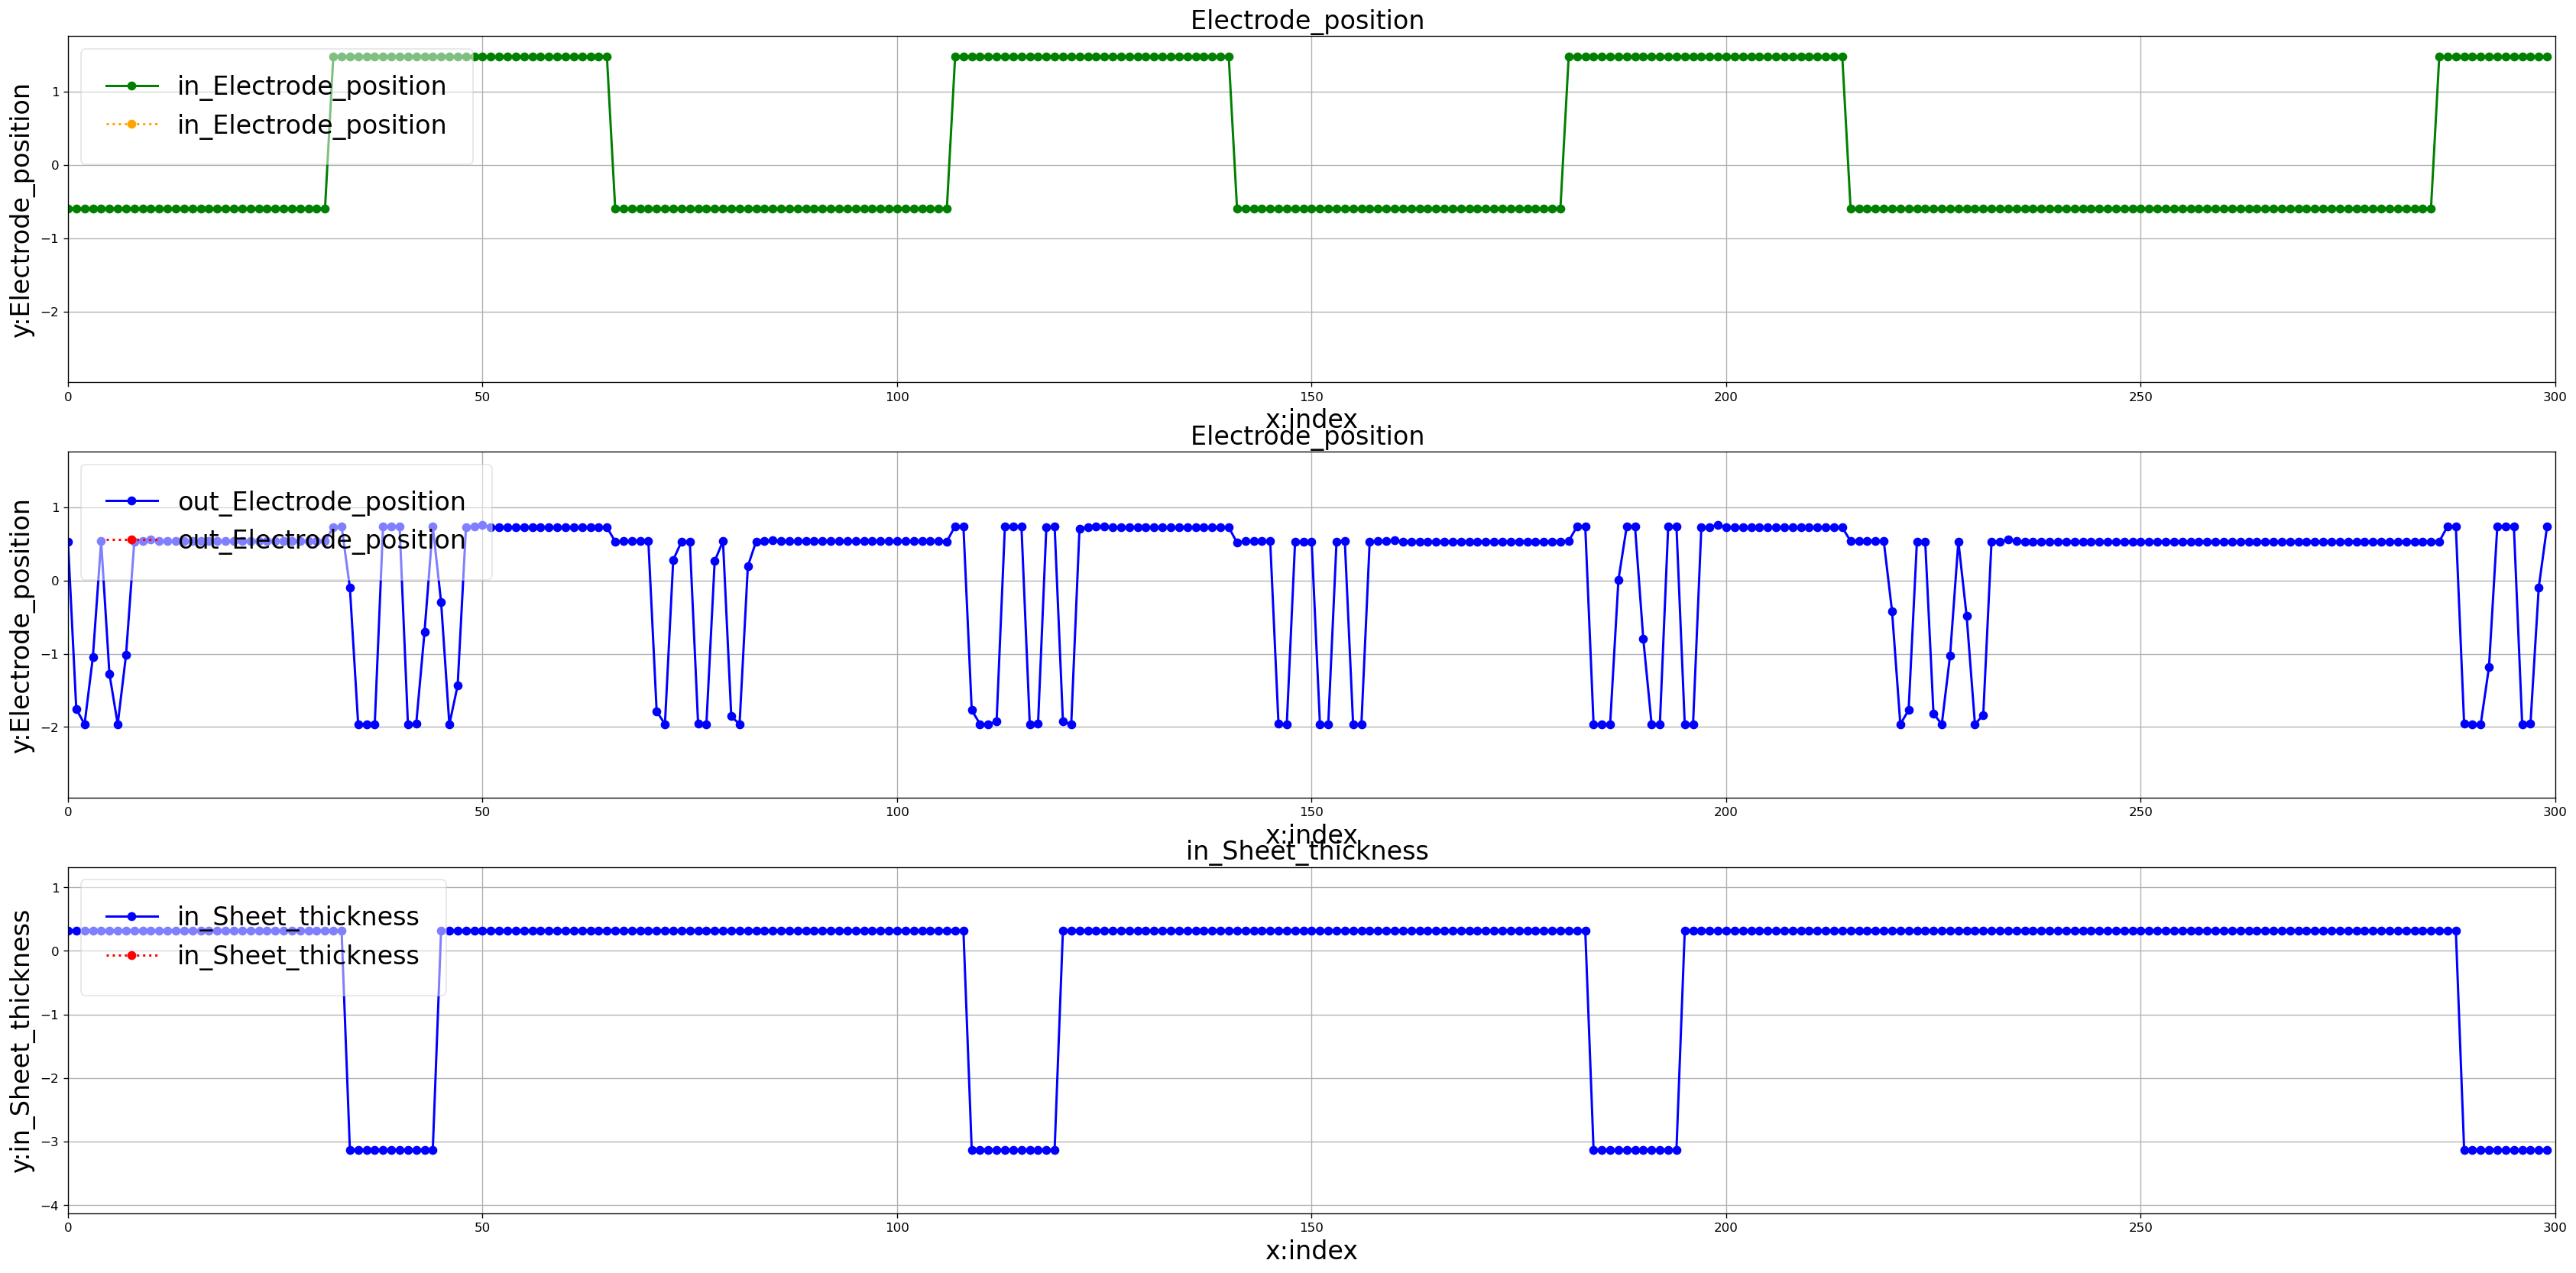

In [8]:
# 可视化，蓝色和绿色代表原始数据中存在的数据，红色和橙色为后填补的数据。
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(35, 17), dpi=120)

    # ============
    # First plot
    # ============

ax = fig.add_subplot(3, 1, 1)
# # # Plot Line1
# ax.plot(L.iloc[0:300, :].out_Electrode_force.tolist(), 'o-',
#             color='blue', linewidth=1.8, markersize=6, label='out_Electrode_force')
# ax.plot(L_imputed[L.isnull()].iloc[0:300, :].out_Electrode_force.tolist(), 'o',
#             color='r', linewidth=1.8, markersize=6, label='out_Electrode_force',linestyle='dotted')

ax.plot(L.iloc[0:300, :].in_Electrode_position.tolist(), 'o-',
            color='green', linewidth=1.8, markersize=6, label='in_Electrode_position')
ax.plot(L_imputed[L.isnull()].iloc[0:300, :].in_Electrode_position.tolist(), 'o',
            color='orange', linewidth=1.8, markersize=6, label='in_Electrode_position',linestyle='dotted')

    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('Electrode_position ', fontsize=20)
ax.set_xlim(0, len(L.iloc[0:300, :].out_Electrode_position.tolist()))
ax.set_ylim(min(L.iloc[0:300, :].out_Electrode_position.tolist())-1, max(L.iloc[0:300, :].out_Electrode_position.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:Electrode_position', fontsize=20)  # y label
ax.grid(True)


    # ============
    # Second plot
    # ============

ax = fig.add_subplot(3, 1, 2)
# # # Plot Line1
ax.plot(L.iloc[0:300, :].out_Electrode_position.tolist(), 'o-',
            color='blue', linewidth=1.8, markersize=6, label='out_Electrode_position')
ax.plot(L_imputed[L.isnull()].iloc[0:300, :].out_Electrode_position.tolist(), 'o',
            color='r', linewidth=1.8, markersize=6, label='out_Electrode_position',linestyle='dotted')



    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('Electrode_position ', fontsize=20)
ax.set_xlim(0, len(L.iloc[0:300, :].out_Electrode_position.tolist()))
ax.set_ylim(min(L.iloc[0:300, :].out_Electrode_position.tolist())-1, max(L.iloc[0:300, :].out_Electrode_position.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:Electrode_position', fontsize=20)  # y label
ax.grid(True)

    # ============
    # third plot
    # ============

ax = fig.add_subplot(3, 1, 3)
# # # Plot Line1
ax.plot(L.iloc[0:300, :].in_Sheet_thickness.tolist(), 'o-',
            color='blue', linewidth=1.8, markersize=6, label='in_Sheet_thickness')
ax.plot(L_imputed[L.isnull()].iloc[0:300, :].in_Sheet_thickness.tolist(), 'o',
            color='r', linewidth=1.8, markersize=6, label='in_Sheet_thickness',linestyle='dotted')



    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('in_Sheet_thickness ', fontsize=20)
ax.set_xlim(0, len(L.iloc[0:300, :].in_Sheet_thickness.tolist()))
ax.set_ylim(min(L.iloc[0:300, :].in_Sheet_thickness.tolist())-1, max(L.iloc[0:300, :].in_Sheet_thickness.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:in_Sheet_thickness', fontsize=20)  # y label
ax.grid(True)


##  Testing the stationarity of the time series using Augmented Dickey Fuller Test (ADF Test)

 a fair inference on whether the series is stationary or not.

In [159]:
from statsmodels.tsa.stattools import adfuller
names = ['W_position_count','in_Electrode_force','in_Electrode_position','in_Sheet_thickness','out_Electrode_force','out_Electrode_position']
for i in range(0,6,1):
    series = L_imputed.iloc[:, [i]].values
    result = adfuller(series, autolag='AIC')
    print(names[i])
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')   
    print('--------------------------------------')

W_position_count
ADF Statistic: 0.8699682840637536
n_lags: 0.9926856179679915
p-value: 0.9926856179679915
Critial Values:
   1%, -3.4321682745778963
Critial Values:
   5%, -2.86234341192807
Critial Values:
   10%, -2.56719766893431
--------------------------------------
in_Electrode_force
ADF Statistic: -5.917935487367802
n_lags: 2.5465334564378954e-07
p-value: 2.5465334564378954e-07
Critial Values:
   1%, -3.432180489957965
Critial Values:
   5%, -2.8623488076835053
Critial Values:
   10%, -2.56720054146413
--------------------------------------
in_Electrode_position
ADF Statistic: -11.615746671711591
n_lags: 2.451415660948807e-21
p-value: 2.451415660948807e-21
Critial Values:
   1%, -3.4321789540671963
Critial Values:
   5%, -2.8623481292538475
Critial Values:
   10%, -2.5672001802893964
--------------------------------------
in_Sheet_thickness
ADF Statistic: -10.632857855592198
n_lags: 5.160786281641659e-19
p-value: 5.160786281641659e-19
Critial Values:
   1%, -3.432183569491245
Cri

####  The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the W_position_counttime series   is  in fact non-stationary.
#### The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the other series is stationary. Let’s visualise the series as well to confirm.

### 同步相关性分析

### 全局

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stats

overall_pearson_r = L_imputed.corr().iloc[1,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(L_imputed.dropna()['in_Electrode_force'], L_imputed.dropna()['in_Electrode_position'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 计算滑动窗口同步性

Pandas computed Pearson r: -0.6762974593669285
Scipy computed Pearson r: -0.3760496122798759 and p-value: 0.0


In [36]:
L_imputed.corr()

,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,W_Start_friction,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up
out_Cap_offset,1.000000,-0.011558,0.021796,-0.009408,-0.016217,0.177698,NaN,NaN,NaN,0.594038,0.594031,0.008838,0.009517,0.071701,0.009613,NaN,-0.009080
out_Electrode_force,-0.011558,1.000000,-0.676297,0.887381,0.710030,-0.031180,NaN,NaN,NaN,0.021136,0.021131,-0.807062,0.050156,0.187632,-0.308036,NaN,0.803831
out_Electrode_position,0.021796,-0.676297,1.000000,-0.558701,-0.595037,-0.009490,NaN,NaN,NaN,0.127846,0.127850,0.606138,-0.222410,0.137696,0.230346,NaN,-0.607700
out_force_build_up,-0.009408,0.887381,-0.558701,1.000000,0.579435,-0.015484,NaN,NaN,NaN,0.039170,0.039162,-0.777798,-0.008397,0.126706,-0.371075,NaN,0.782175
C_Cylinder_force,-0.016217,0.710030,-0.595037,0.579435,1.000000,-0.027193,NaN,NaN,NaN,-0.018419,-0.018419,-0.738922,0.080029,0.065861,-0.258680,NaN,0.735867
W_Friction,0.177698,-0.031180,-0.009490,-0.015484,-0.027193,1.000000,NaN,NaN,NaN,-0.089083,-0.089103,0.030462,0.068365,-0.011401,0.034781,NaN,-0.031214
W_Maximum_aperture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Maximum_electrode_force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Start_friction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Welding_point_count,0.594038,0.021136,0.127846,0.039170,-0.018419,-0.089083,NaN,NaN,NaN,1.000000,1.000000,-0.047327,-0.088781,0.221337,-0.040578,NaN,0.047322


## 与out_Electrode_position相关的变量(r>0.01）[1,2,3,4,9,10,11,12,13,14,16]

### 窗口统计

In [148]:
# 设置窗口宽度，以计算滑动窗口同步性
r_window_size = 100
# 计算滑动窗口同步性
rolling_r = L_imputed['in_Electrode_force'].rolling(window=r_window_size, center=True).corr(L_imputed['in_Electrode_position'])
rolling_r

time
2021-12-21 00:51:23+00:00   NaN
2021-12-21 00:51:24+00:00   NaN
2021-12-21 00:51:25+00:00   NaN
2021-12-21 00:51:26+00:00   NaN
2021-12-21 00:51:27+00:00   NaN
                             ..
2021-12-21 01:51:18+00:00   NaN
2021-12-21 01:51:19+00:00   NaN
2021-12-21 01:51:20+00:00   NaN
2021-12-21 01:51:21+00:00   NaN
2021-12-21 01:51:22+00:00   NaN
Freq: S, Length: 3600, dtype: float64

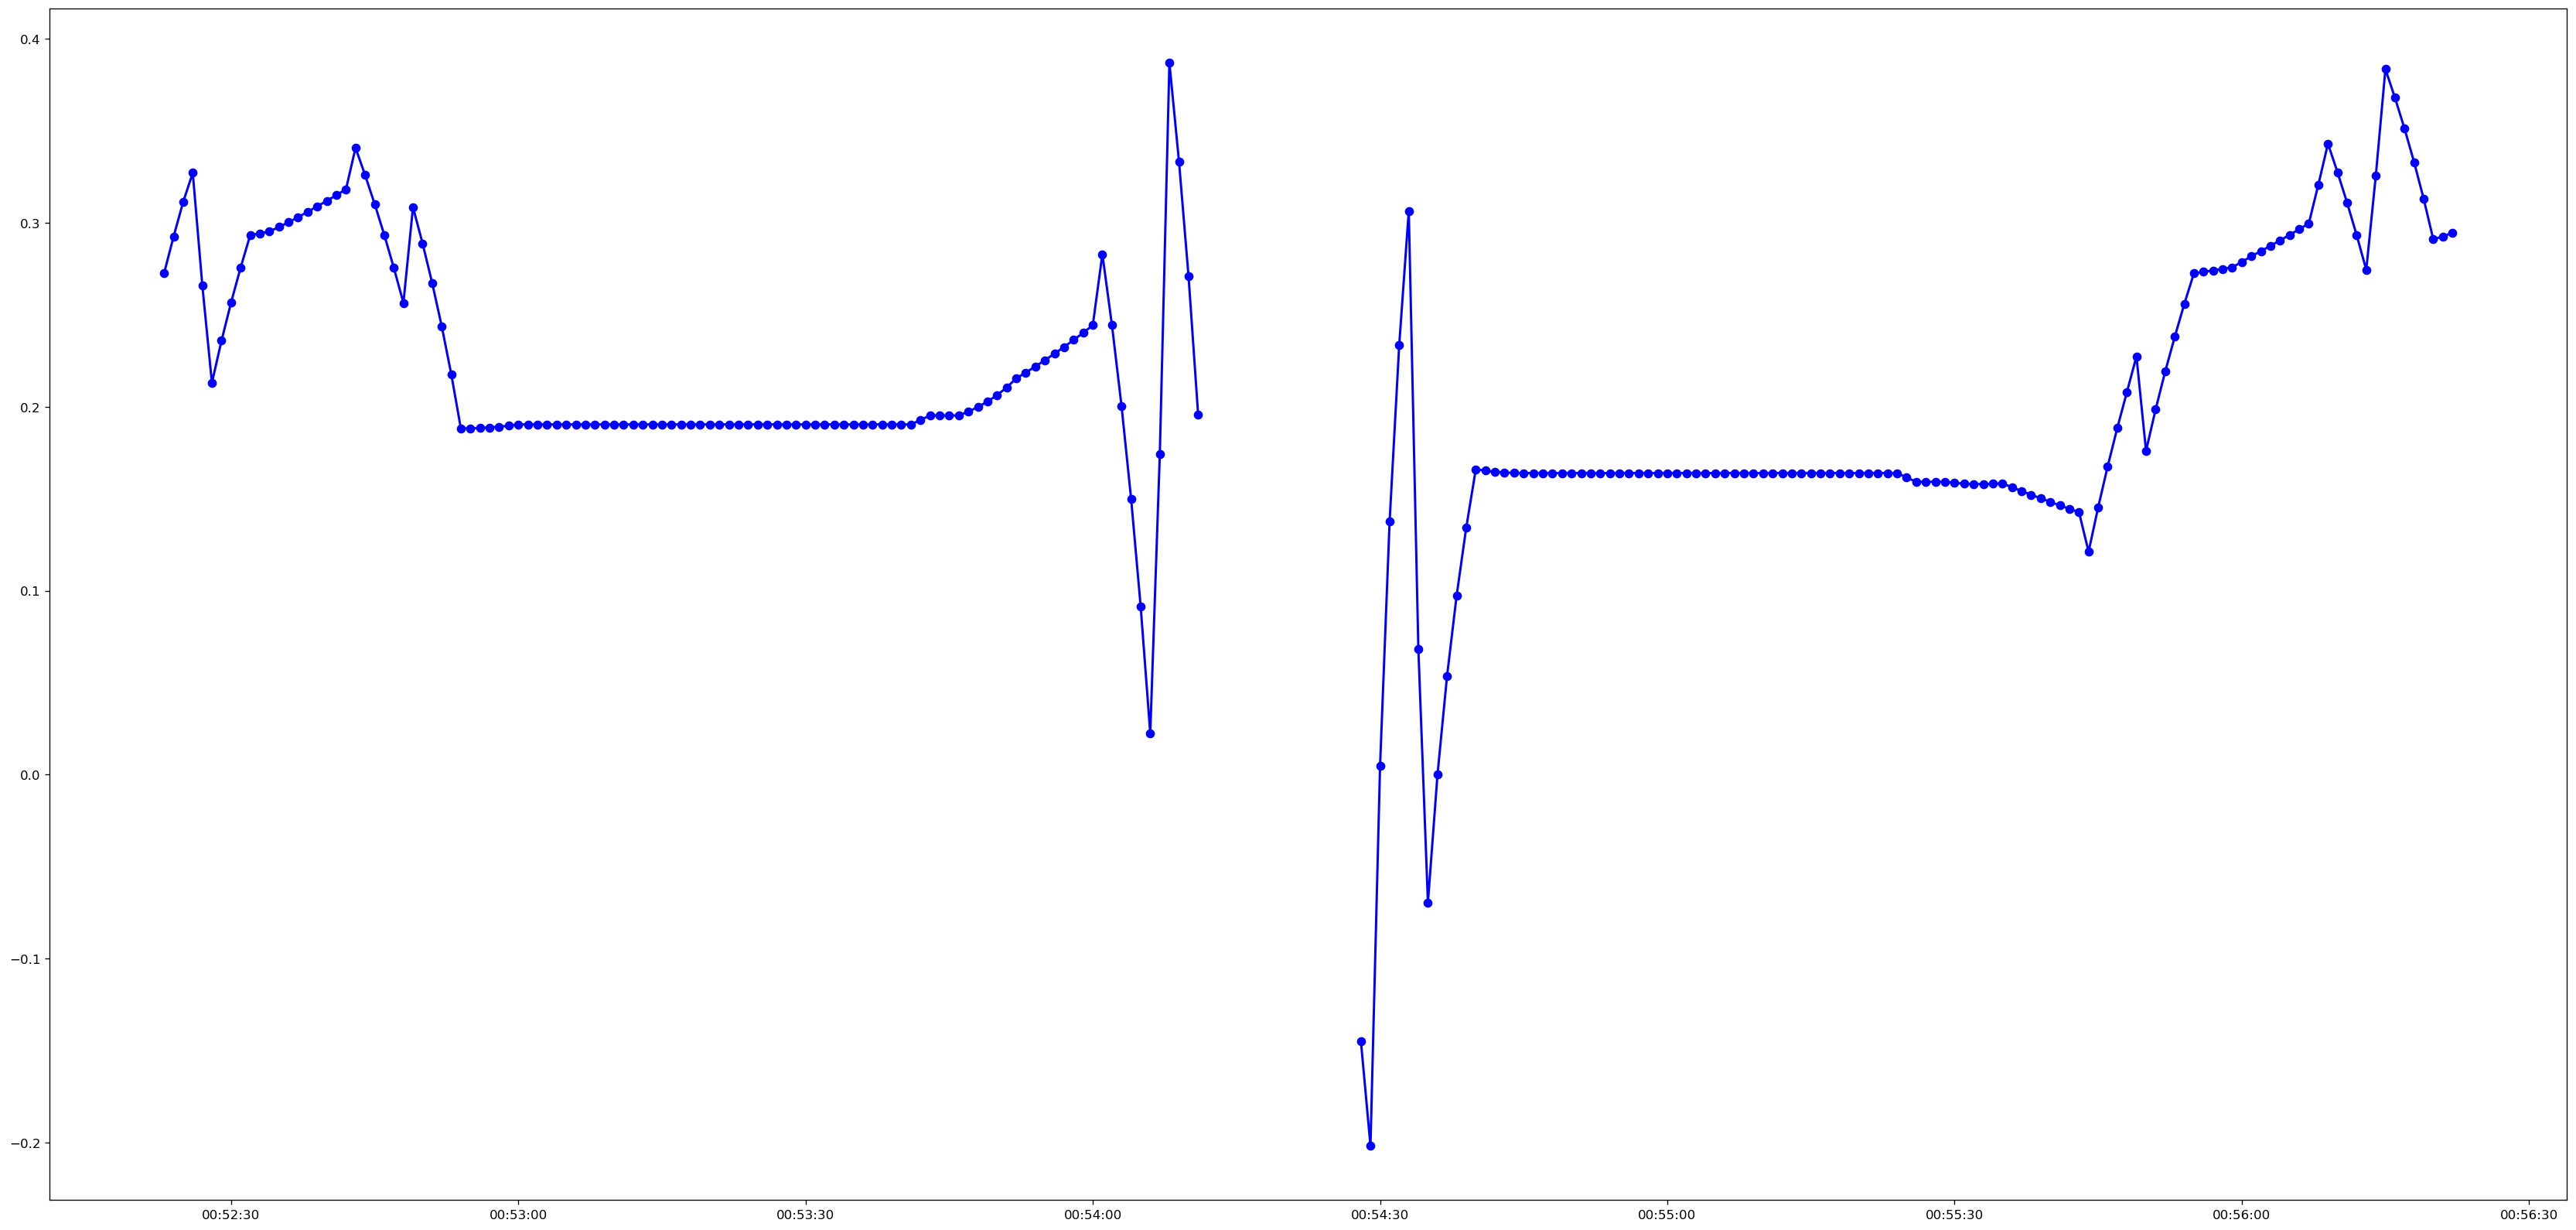

In [149]:
# 可视化，蓝色和绿色代表原始数据中存在的数据，红色和橙色为后填补的数据。
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(35, 17), dpi=120)

ax = fig.add_subplot(1, 1, 1)
# # # Plot Line1
ax.plot(rolling_r[0:300], 'o-',
            color='blue', linewidth=1.8, markersize=6, label='rolling_r')


    
# ax.legend(frameon=True,  # legend border
#               framealpha=.5,  # transparency of border
#               ncol=1,  # num columns
#               # shadow=True,  # shadow on
#               borderpad=1,  # thickness of border
#               fontsize=20,
#               loc=2
#               )
# ax.set_title('rolling_r ', fontsize=20)
# ax.set_xlim(0, len(rolling_r.iloc[0:300, :]))
# ax.set_ylim(min(rolling_r)-0.1, max(rolling_r)+0.1)
# ax.set_xlabel('x:index', fontsize=20)  # x label
# ax.set_ylabel('y:rolling_r', fontsize=20)  # y label
# ax.grid(True)

In [142]:
 L_imputed['in_Electrode_force'].rolling(window=r_window_size, center=True).mean()

time
2021-12-21 00:51:23+00:00         NaN
2021-12-21 00:51:24+00:00         NaN
2021-12-21 00:51:25+00:00         NaN
2021-12-21 00:51:26+00:00         NaN
2021-12-21 00:51:27+00:00         NaN
                               ...   
2021-12-21 01:51:18+00:00   -0.083384
2021-12-21 01:51:19+00:00         NaN
2021-12-21 01:51:20+00:00         NaN
2021-12-21 01:51:21+00:00         NaN
2021-12-21 01:51:22+00:00         NaN
Freq: S, Name: in_Electrode_force, Length: 3600, dtype: float64

In [11]:
np.save('L_imputed.npy', L_imputed.iloc[:, 1:])

In [12]:
from PrototypeWidgets import ProjectWindow
ProjectWindow().show()

In [9]:
L_imputed

,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,W_Start_friction,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up
time,,,,,,,,,,,,,,,,,
2021-09-10 22:06:15,0.0,0.0,249.7,0.0,-382.0,-421.0,350.0,5219.0,303.0,4511291.0,11640085.0,14.991055,3200.0,250.0,3.1,1.0,0.0
2021-09-10 22:06:16,0.0,221.0,21.2,0.0,8836.0,-421.0,350.0,5219.0,303.0,4511291.0,11640086.0,9.849975,3200.0,250.0,3.1,1.0,1.0
2021-09-10 22:06:17,0.0,3200.0,0.1,1.0,8703.0,-421.0,350.0,5219.0,303.0,4511292.0,11640086.0,9.849975,3200.0,250.0,3.1,1.0,1.0
2021-09-10 22:06:18,0.0,0.0,91.5,0.0,-664.0,-421.0,350.0,5219.0,303.0,4511292.0,11640086.0,14.991055,3200.0,250.0,3.1,1.0,0.0
2021-09-10 22:06:19,0.0,0.0,250.3,0.0,-216.0,-421.0,350.0,5219.0,303.0,4511292.0,11640087.0,14.991055,3200.0,250.0,3.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17 22:16:11,1.6,361.0,249.8,0.0,1110.0,230.0,350.0,5219.0,303.0,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0
2021-09-17 22:16:12,1.6,352.0,249.8,0.0,1113.0,230.0,350.0,5219.0,303.0,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0
2021-09-17 22:16:13,1.6,365.0,249.8,0.0,1104.0,230.0,350.0,5219.0,303.0,4541051.0,11714674.0,14.991055,3200.0,250.0,3.1,1.0,0.0


### 自相关分析

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


D:\Anaconda3\envs\darts\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
D:\Anaconda3\envs\darts\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 2520x1152 with 0 Axes>

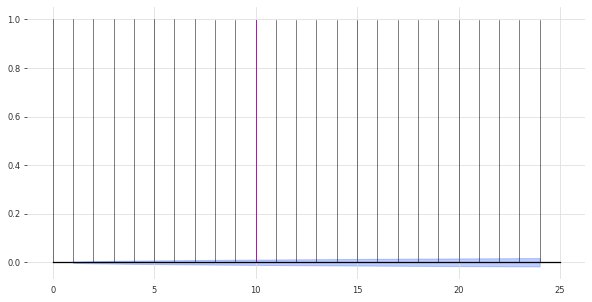

<Figure size 2520x1152 with 0 Axes>

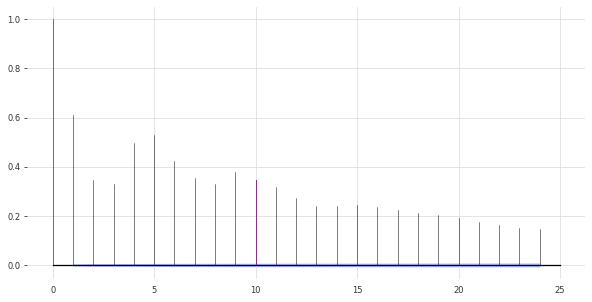

<Figure size 2520x1152 with 0 Axes>

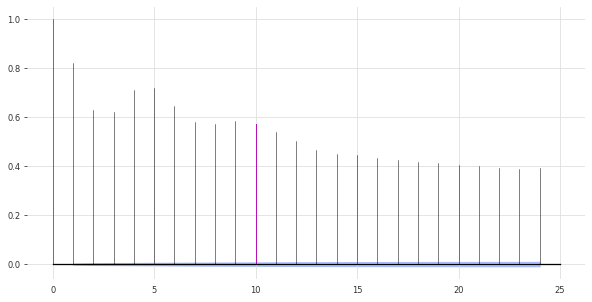

<Figure size 2520x1152 with 0 Axes>

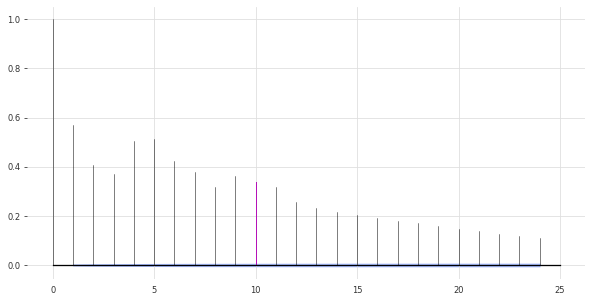

<Figure size 2520x1152 with 0 Axes>

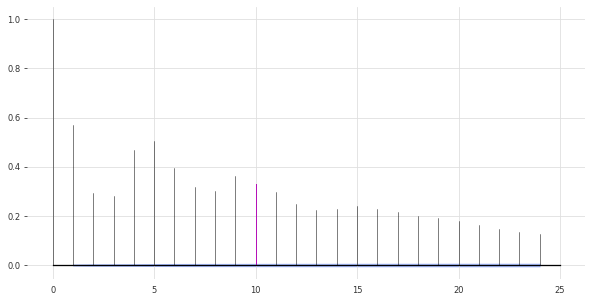

<Figure size 2520x1152 with 0 Axes>

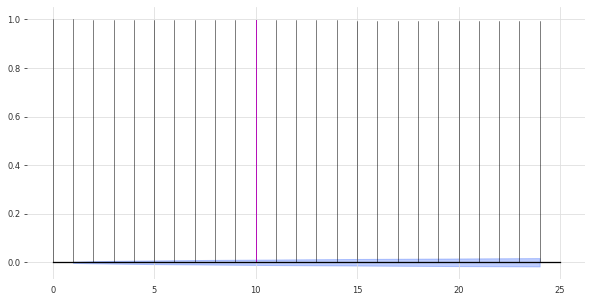

<Figure size 2520x1152 with 0 Axes>

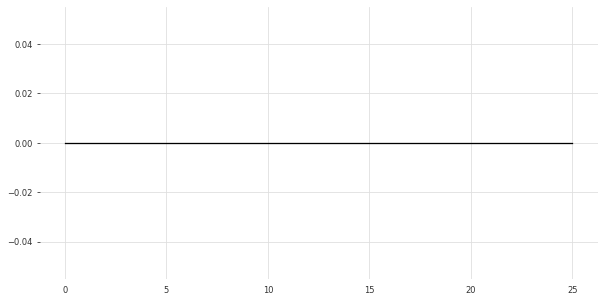

<Figure size 2520x1152 with 0 Axes>

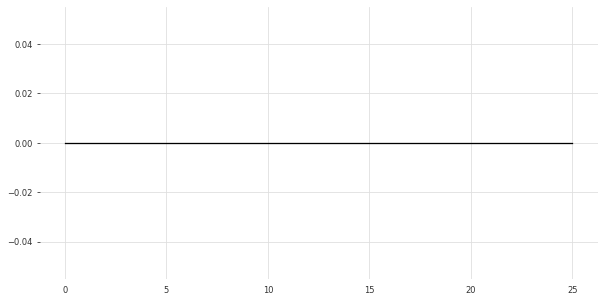

<Figure size 2520x1152 with 0 Axes>

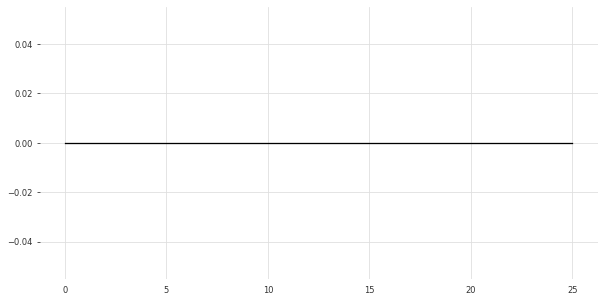

<Figure size 2520x1152 with 0 Axes>

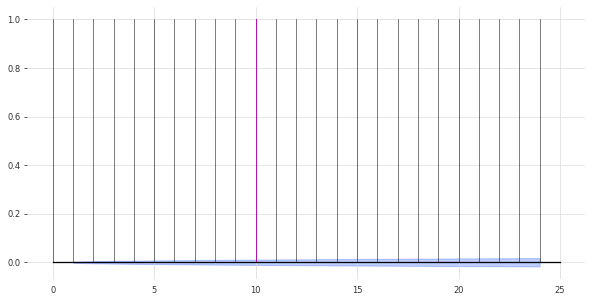

<Figure size 2520x1152 with 0 Axes>

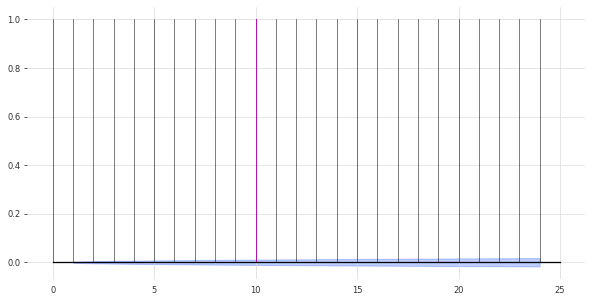

<Figure size 2520x1152 with 0 Axes>

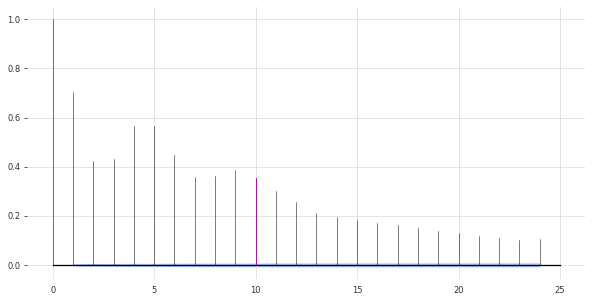

<Figure size 2520x1152 with 0 Axes>

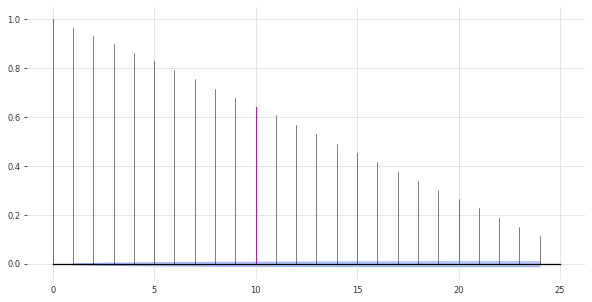

<Figure size 2520x1152 with 0 Axes>

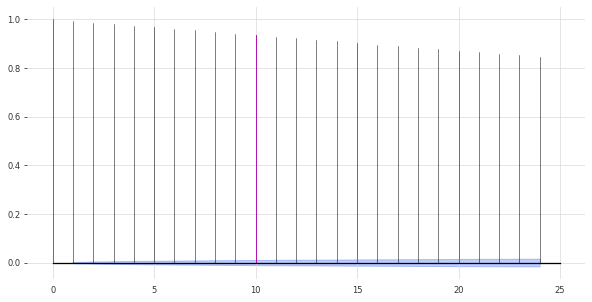

<Figure size 2520x1152 with 0 Axes>

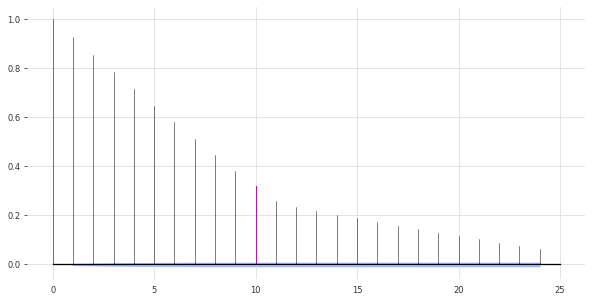

<Figure size 2520x1152 with 0 Axes>

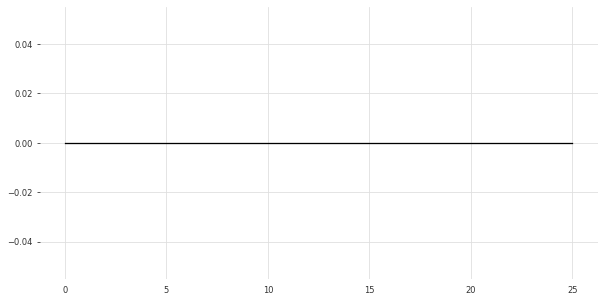

In [9]:
from darts.utils.statistics import plot_acf, check_seasonality
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset
for i in range(0,16):
    series = TimeSeries.from_dataframe(L_imputed.iloc[:,i:i+1])
    plt.figure(figsize=(35, 16))
    plot_acf(series, m=10, alpha=0.05)


In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(series, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

### 点预测 freq=1 S (需要在darts环境下运行)

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

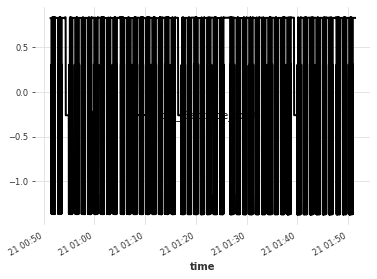

In [292]:
series = TimeSeries.from_dataframe(L_imputed.iloc[:, 5:6],freq='S')
series.plot()

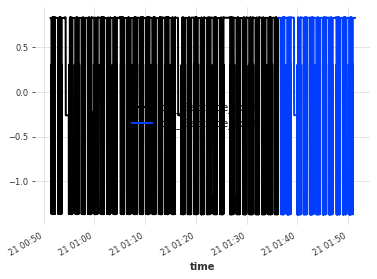

In [293]:
train, val = series.split_before(0.75)
train.plot()
val.plot()

In [248]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 4.
There is seasonality of order 10.
There is seasonality of order 15.
There is seasonality of order 19.


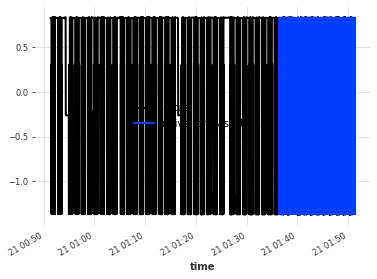

In [270]:
seasonal_model = NaiveSeasonal(K=10)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(len(val))

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=10)")

In [250]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, seasonal_forecast)
    )
)

Mean absolute percentage error for the combined naive drift + seasonal: 125.79%.


model Auto-ARIMA obtains MAPE: 99.59%


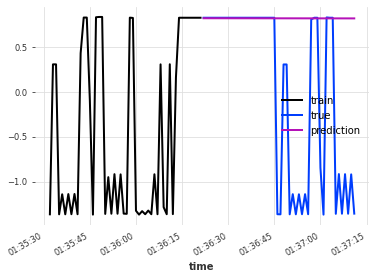

In [289]:
from darts.models import ExponentialSmoothing, Prophet, AutoARIMA, Theta
from darts.utils.utils import SeasonalityMode

def eval_model(model):
    model.fit(train)
    Prophetforecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, Prophetforecast)))
    train[-50:].plot(label="train")
    val[:50].plot(label="true")
    pred_best_theta[:50].plot(label="prediction")

# eval_model(Theta(seasonality_period=10, season_mode=SeasonalityMode.ADDITIVE ))
# eval_model(ExponentialSmoothing(seasonal_periods=10))
# eval_model(Prophet())
eval_model(AutoARIMA())


In [273]:
# Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:
    model = Theta(theta,seasonality_period=10, season_mode=SeasonalityMode.NONE)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

In [276]:
best_theta_model = Theta(best_theta,seasonality_period=10, season_mode=SeasonalityMode.NONE)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

The MAPE is: 114.62, with theta = 0.16326530612244916.


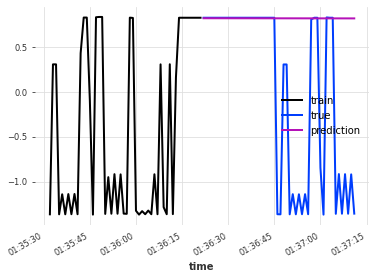

In [280]:
train[-50:].plot(label="train")
val[:50].plot(label="true")
pred_best_theta[:50].plot(label="prediction")

### 多变量

In [290]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
file = 'H:/丢包统计/miss data clustering/raw data/10th5495048-1004_3598.csv'#10th5028096-1003_2035有缺失值，10th5495048-1004_3598有离群点
df = pd.read_csv(file, index_col='time')
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df.resample('S').asfreq()
df=df.apply(pd.to_numeric, errors='ignore')
df[df['in_Sheet_thickness']>5] = np.nan
df[df['in_Sheet_thickness']<=0] = np.nan
df.iloc[:, [15, 21, 22, 23, 29, 30]]= StandardScaler().fit_transform(df.iloc[:, [15, 21, 22, 23, 29, 30]])# 数值类型特征标准化
L = df.iloc[:, [15, 21, 22, 23, 29, 30]]
L_imputed=df.iloc[:, [15, 21, 22, 23, 29, 30]]
L_imputed.fillna(method='ffill', inplace=True)
L_imputed

D:\Anaconda3\envs\darts\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,W_position_count,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,out_Electrode_force,out_Electrode_position
time,,,,,,
2021-12-21 00:51:23,-1.749363,-0.573615,0.64314,-0.644943,-0.531430,0.828950
2021-12-21 00:51:24,-1.749363,-0.573615,0.64314,-0.644943,-0.514484,0.828950
2021-12-21 00:51:25,-1.749363,-0.573615,0.64314,-0.644943,-0.529735,0.828950
2021-12-21 00:51:26,-1.749363,-0.573615,0.64314,-0.644943,-0.512789,0.828950
2021-12-21 00:51:27,-1.749363,-0.573615,0.64314,-0.644943,-0.515331,0.828950
...,...,...,...,...,...,...
2021-12-21 01:51:18,1.723639,-0.573615,0.64314,-0.644943,-0.498385,0.831171
2021-12-21 01:51:19,1.723639,-0.573615,0.64314,-0.644943,-0.507705,0.831171
2021-12-21 01:51:20,1.723639,-0.573615,0.64314,-0.644943,-0.517026,0.831171


In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
list=[1,2,3,4,9,10,11,12,13,14,16]
L_imputed = L_imputed.iloc[:, list]

[2022-03-31 05:06:57,881] WARNING | darts.timeseries | Number of components is larger than 10 (11). Plotting only the first 10 components.
[2022-03-31 05:06:58,399] WARNING | darts.timeseries | Number of components is larger than 10 (11). Plotting only the first 10 components.
D:\Anaconda3\envs\darts\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


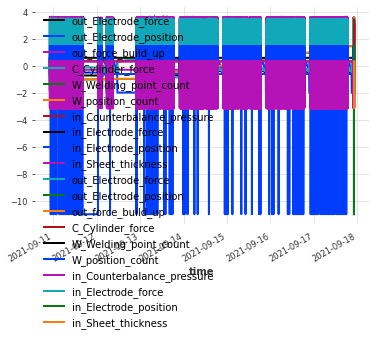

In [42]:
series = TimeSeries.from_dataframe(L_imputed,freq='S')
train, test = series[:-60], series[-60:]
train.plot()
test.plot()

In [ ]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=120, output_chunk_length=60, random_state=42)

model.fit(train, epochs=50, verbose=True)

In [ ]:
pred = model.predict(series=train,n=len(val))

# # scale back:
# pred = scaler.inverse_transform(pred)

plt.figure(figsize=(35, 16))
train[-50:].plot(label="train")
val[:70].plot(label="actual")
pred[:70].plot(label="forecast")

In [ ]:
series = TimeSeries.from_dataframe(L_imputed.iloc[:,1:2],freq='S')
train, val = series.series[:-600], series[-600:]
train.plot()
val.plot()
list_covs=[1,3,4,9,10,11,12,13,14,16]
series_covs = TimeSeries.from_dataframe(L_imputed.iloc[:,list_covs],freq='S')

[2022-03-30 04:33:29,291] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2188 samples.
[2022-03-30 04:33:29,291] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 2188 samples.
INFO:darts.models.forecasting.torch_forecasting_model:Train dataset contains 2188 samples.
[2022-03-30 04:33:29,451] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-30 04:33:29,451] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
INFO:darts.models.forecasting.torch_forecasting_model:Time series values are 64-bits; casting model to float64.
[2022-03-30 04:33:29,452] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_b

Epoch 49: 100%|███████████████████████████████████████| 69/69 [00:28<00:00,  2.42it/s, loss=0.0163, train_loss=0.00588]


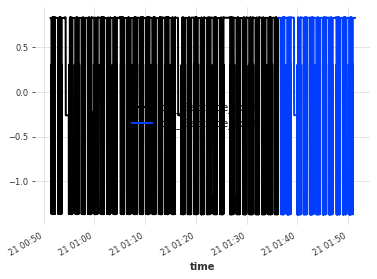

In [324]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=1800, output_chunk_length=600, random_state=42)

model.fit(train,past_covariates=series_covs,epochs=50, verbose=True)

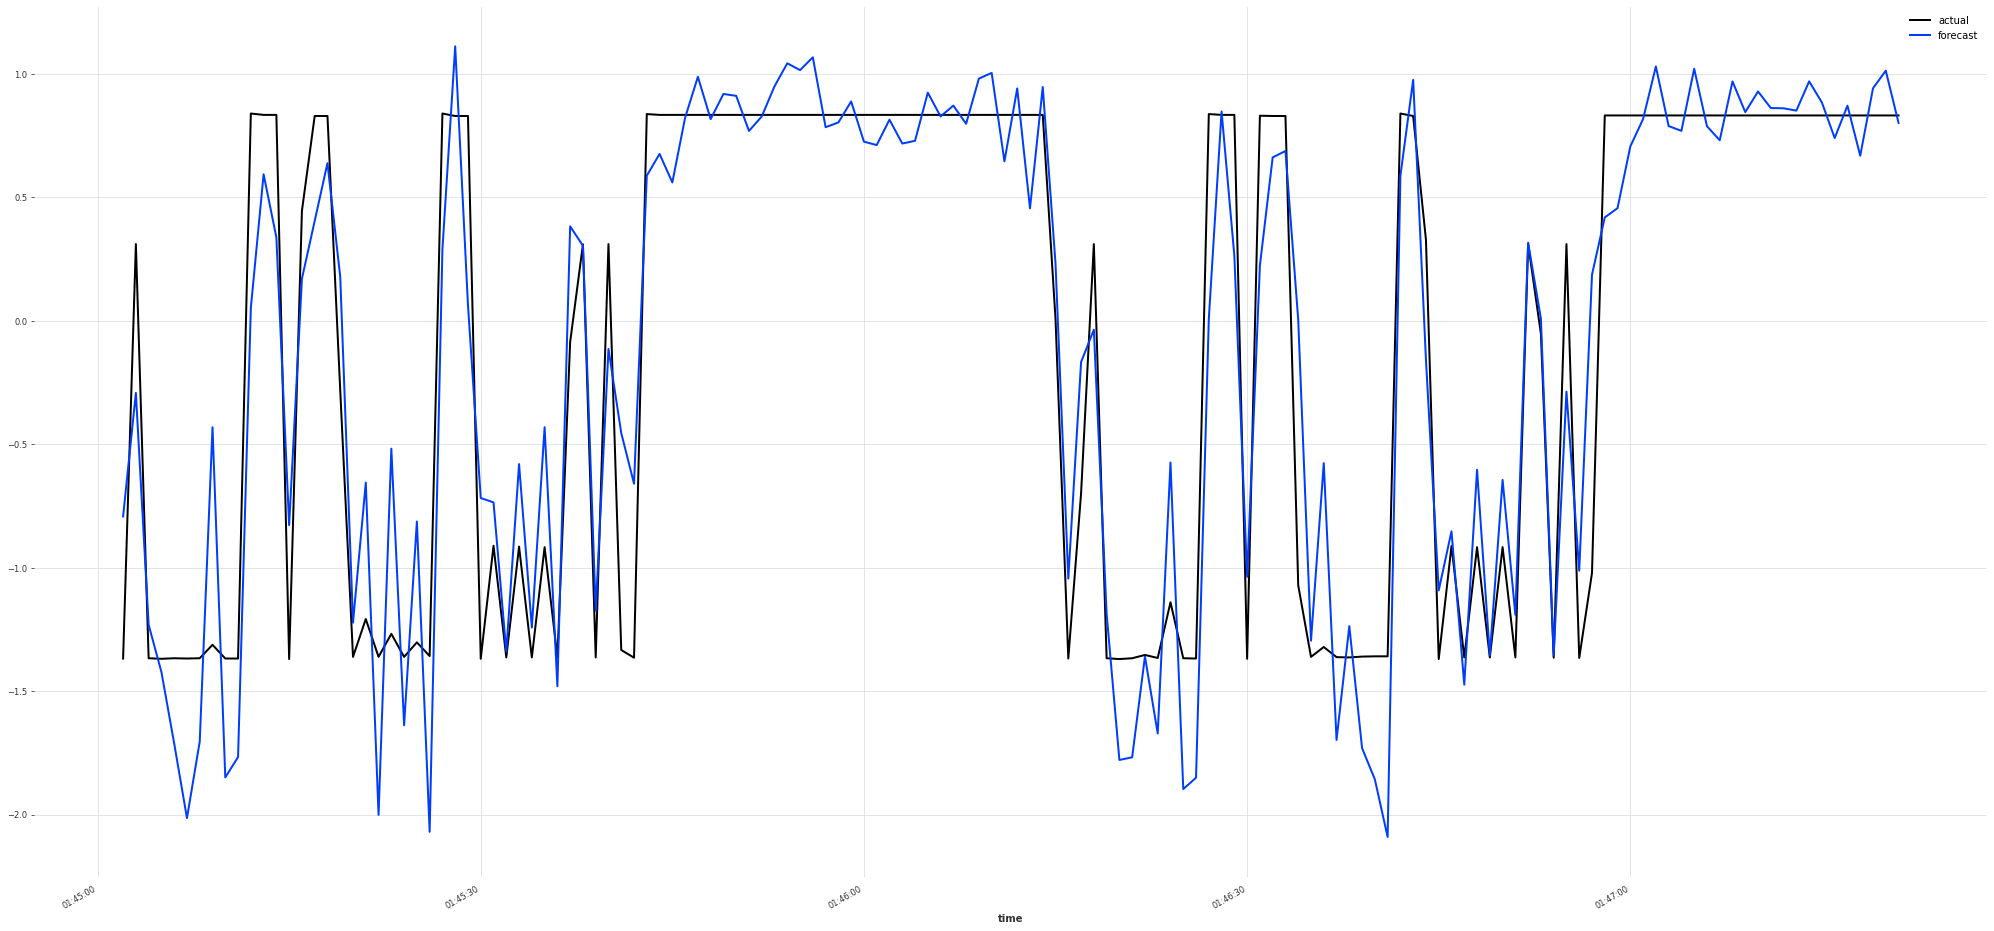

In [331]:
pred = model.predict(series=train,n=len(test))

# # scale back:
# pred = scaler.inverse_transform(pred)

plt.figure(figsize=(35, 16))
# train[-50:].plot(label="train")
val[520:660].plot(label="actual")
pred[520:660].plot(label="forecast")

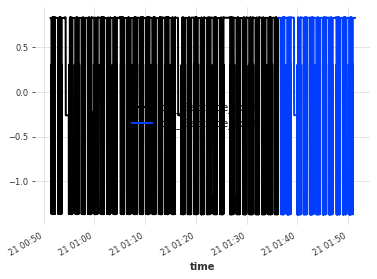

In [335]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

series = TimeSeries.from_dataframe(L_imputed.iloc[:,5:6],freq='S')
train, val = series.series[:-600], series[-600:]
train.plot()
val.plot()
list_covs=[1,3,4,9,10,11,12,13,14,16]
series_covs = TimeSeries.from_dataframe(L_imputed.iloc[:,list_covs],freq='S')
model = RegressionModel(lags=500, lags_future_covariates=[-500, 0], model=BayesianRidge())

model.fit(train,future_covariates=series_covs)

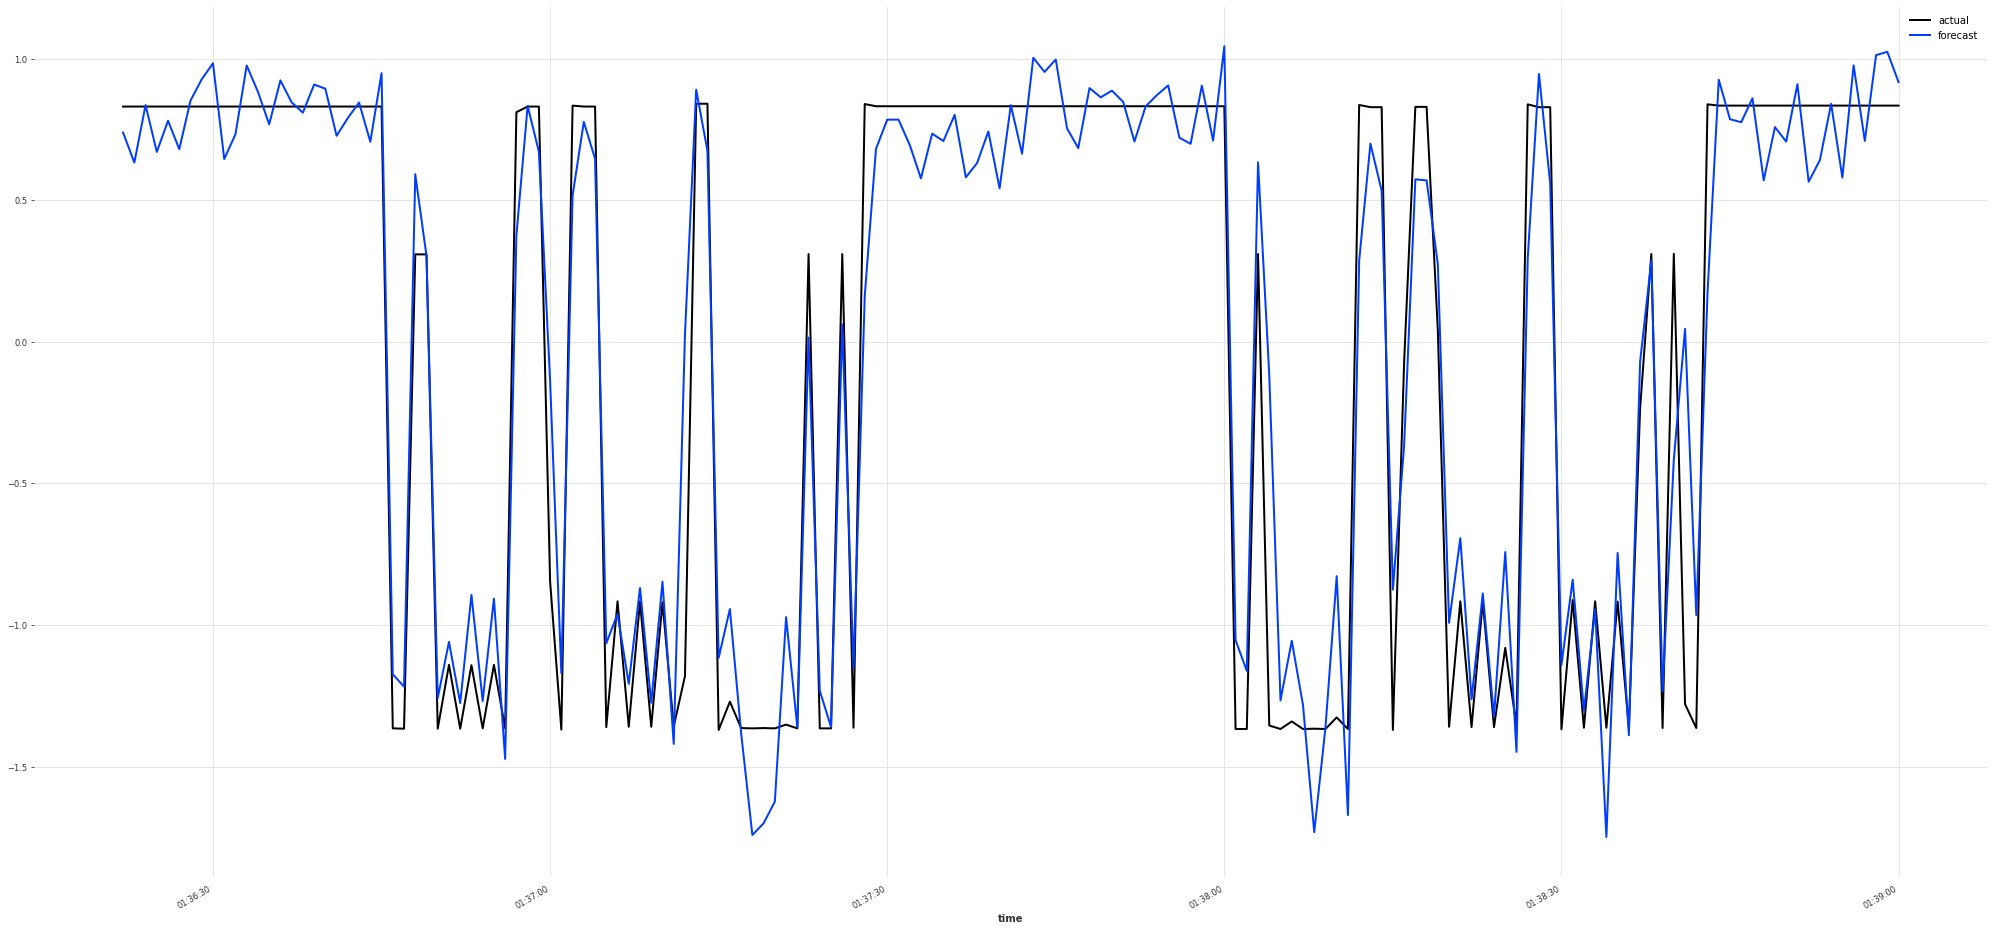

In [338]:
pred = model.predict(series=train,future_covariates=series_covs,n=len(test))

# # scale back:
# pred = scaler.inverse_transform(pred)

plt.figure(figsize=(35, 16))
# train[-50:].plot(label="train")
val[:159].plot(label="actual")
pred[:159].plot(label="forecast")

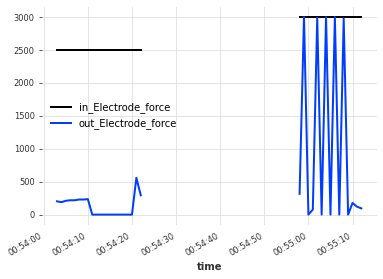

In [89]:
from darts.utils.missing_values import fill_missing_values
series_raw = TimeSeries.from_dataframe(df.iloc[160:230, [21,29]])
(series_raw).plot()

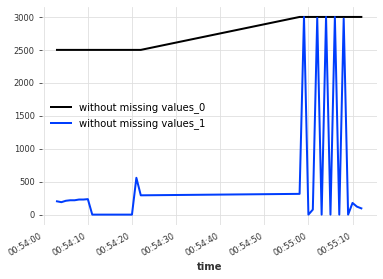

In [90]:
fill_missing_values(series_raw).plot(label="without missing values")

### 概率预测模型 freq=1min

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts import Trainer

ImportError: cannot import name 'DType' from 'gluonts.core.component' (D:\Anaconda3\lib\site-packages\gluonts\core\component.py)

In [30]:
L_imputed[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [31]:
training_data = ListDataset(
    [{"start": L_imputed.index[0], "target": L_imputed.out_Electrode_position[:3540]}],
    freq = "S"
)

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="T",
                            prediction_length=12,
                            input_size=42,
                            trainer=Trainer(epochs=10,
                                            device=device)
                           )
predictor = estimator.train(training_data=training_data, num_workers=4)

NameError: name 'DeepAREstimator' is not defined

In [19]:
ListDataset

gluonts.dataset.common.ListDataset

In [20]:
L_imputed.index

DatetimeIndex(['2021-12-21 00:51:23', '2021-12-21 00:51:24',
               '2021-12-21 00:51:25', '2021-12-21 00:51:26',
               '2021-12-21 00:51:27', '2021-12-21 00:51:28',
               '2021-12-21 00:51:29', '2021-12-21 00:51:30',
               '2021-12-21 00:51:31', '2021-12-21 00:51:32',
               ...
               '2021-12-21 01:51:13', '2021-12-21 01:51:14',
               '2021-12-21 01:51:15', '2021-12-21 01:51:16',
               '2021-12-21 01:51:17', '2021-12-21 01:51:18',
               '2021-12-21 01:51:19', '2021-12-21 01:51:20',
               '2021-12-21 01:51:21', '2021-12-21 01:51:22'],
              dtype='datetime64[ns]', name='time', length=3600, freq='S')

In [18]:
# url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv('Twitter_volume_AMZN.csv', header=0, index_col=0, parse_dates=True)
df.index

DatetimeIndex(['2015-02-26 21:42:53', '2015-02-26 21:47:53',
               '2015-02-26 21:52:53', '2015-02-26 21:57:53',
               '2015-02-26 22:02:53', '2015-02-26 22:07:53',
               '2015-02-26 22:12:53', '2015-02-26 22:17:53',
               '2015-02-26 22:22:53', '2015-02-26 22:27:53',
               ...
               '2015-04-22 20:07:53', '2015-04-22 20:12:53',
               '2015-04-22 20:17:53', '2015-04-22 20:22:53',
               '2015-04-22 20:27:53', '2015-04-22 20:32:53',
               '2015-04-22 20:37:53', '2015-04-22 20:42:53',
               '2015-04-22 20:47:53', '2015-04-22 20:52:53'],
              dtype='datetime64[ns]', name='timestamp', length=15831, freq=None)

In [52]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [53]:
df.index

DatetimeIndex(['2015-02-26 21:42:53', '2015-02-26 21:47:53',
               '2015-02-26 21:52:53', '2015-02-26 21:57:53',
               '2015-02-26 22:02:53', '2015-02-26 22:07:53',
               '2015-02-26 22:12:53', '2015-02-26 22:17:53',
               '2015-02-26 22:22:53', '2015-02-26 22:27:53',
               ...
               '2015-04-22 20:07:53', '2015-04-22 20:12:53',
               '2015-04-22 20:17:53', '2015-04-22 20:22:53',
               '2015-04-22 20:27:53', '2015-04-22 20:32:53',
               '2015-04-22 20:37:53', '2015-04-22 20:42:53',
               '2015-04-22 20:47:53', '2015-04-22 20:52:53'],
              dtype='datetime64[ns]', name='timestamp', length=15831, freq=None)

In [40]:
df.value[:"2015-04-05 00:00:00"]

timestamp
2015-02-26 21:42:53    57
2015-02-26 21:47:53    43
2015-02-26 21:52:53    55
2015-02-26 21:57:53    64
2015-02-26 22:02:53    93
                       ..
2015-04-04 23:37:53    31
2015-04-04 23:42:53    40
2015-04-04 23:47:53    44
2015-04-04 23:52:53    61
2015-04-04 23:57:53    59
Name: value, Length: 10684, dtype: int64

In [59]:
from pandas.tseries.frequencies import to_offset
to_offset('5min').name

'T'

In [61]:
np.arange(52*24*7*2 - 1, 52*24*7*2  + 1 + 1).tolist()

[17471, 17472, 17473]

In [63]:
2 * 52 //(1/(24*7))

17472.0

In [ ]:
pip install gluon-ts-master\gluon-ts-master.

In [ ]:
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
preprocessing 0.1.13 has requirement nltk==3.2.4, but you have nltk 3.6.7.
jupyter-server 1.13.5 has requirement pip install pywinpty==0.1.3<2; os_name == "nt", but you have pywinpty 2.0.5.
astropy 4.2.1 has requirement numpy>=1.17, but you have numpy 1.16.6.
anyio 3.5.0 has requirement idna>=2.8, but you have idna 2.6.